## Project 01
# Are there more students in section 2 and on-campus or section 2 and off-campus
I hypothesize that there are more students enrolled in section 2 who live off campus.


In [120]:
%reload_ext autoreload
%autoreload 2

In [121]:
DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

# Organizing the data

I am looking at the number of students in Comp110 that are both section 2 and on campus, in order to do this I am going to organize the data first. 

1.Here I use the read_csv_rows to create a list of dictionaries where each index is the values of the rows. 

2. To simplify the list and make it easier to filter later on, I turned the list into a dictionary using the columnar function so that I can access the values of student answers under data_cols["section] and data_cols["on_campus"]

3. After this I used the head function to get a column-oriented table. Within head I entered an N of 10 so that we only so the entries of the first ten students, the purpose of this is to get a general sense of the data. 

In [122]:
from tabulate import tabulate
from data_utils import read_csv_rows, columnar, head, count

data_rows: list[dict[str,str]]=read_csv_rows(DATA_FILE_PATH)
# this creates a list of dictionaries where each index is the values of the rows and outputs the names of the columns

# can use head function in place of this

data_cols: dict[str, list[str]] = columnar(data_rows)

# this turns the list into a dictionary so you can access a column of answers by writing data_cols("column")
 
data_cols_head: dict[str, list[str]] = head(data_cols, 10)
tabulate(data_cols_head, data_cols_head.keys(), "html")
# create two side by side graphs of on campus and on campus and section 1/2 (distribution of data of all students vs in section 2)


row_number,year,unc_status,comp_major,primary_major,prereqs,prior_exp,AP_Principles,AP_A,other_comp,prior_time,languages,residency,on_campus,international,section,lesson_time,sync_perf,all_sync,own_notes,own_examples,oh_visits,ls_effective,lsqs_effective,programming_effective,qz_effective,oh_effective,tutoring_effective,kaki_effective,pace,difficulty,understanding,interested,valuable,grade,would_recommend
0,21,Returning UNC Student,No,Public Health,"MATH 231, MATH 232, MATH 233, STOR 155",1-2 years,No,No,UNC,1 month or so,"Python, R / Matlab / SAS, Other",Out-of-state,Yes,I am living in the United States,Section 2 - 5:00pm - Async,1,3,3,7,4,2,3,5,3,4,7,3,4,5,5,5,7,7,A,6
1,23,Returning UNC Student,No,Statistics,"MATH 130, MATH 231, STOR 120, STOR 151",2-6 months,No,No,UNC,None to less than one month!,Python,In-state,Yes,I am living in the United States,Section 1 - 3:30pm - Sync + Async,1,4,3,6,1,5,5,2,3,7,7,,7,7,7,3,7,7,B,7
2,23,Returning UNC Student,No,Statistics,"MATH 130, MATH 231, STOR 120, STOR 151",2-6 months,No,No,UNC,None to less than one month!,Python,In-state,Yes,I am living in the United States,Section 1 - 3:30pm - Sync + Async,1,4,3,6,1,5,5,2,3,7,7,,7,7,7,3,7,7,B,7
3,23,Incoming Transfer Student,No,Sociology,"MATH 231, MATH 232, MATH 233, MATH 347, MATH 381, STOR 155",2-6 months,No,No,On-line course,None to less than one month!,"Python, Java / C#, R / Matlab / SAS, HTML / CSS, SQL",Out-of-state,No,I am living Internationally,Section 1 - 3:30pm - Sync + Async,4,4,4,6,4,0,6,6,6,6,,,7,4,4,5,5,6,A,6
4,24,Incoming First-year Student,Yes - BS,Computer Science,"MATH 129P, MATH 231, MATH 232, MATH 233, STOR 120, STOR 155",7-12 months,Yes,Yes,High school course (IB or other),1 month or so,"Python, Java / C#, BASIC",In-state,No,I am living in the United States,Section 1 - 3:30pm - Sync + Async,4,4,4,5,4,0,4,5,6,4,,,,3,5,5,4,5,A,4
5,22,Returning UNC Student,Yes - Minor,Physics,"MATH 231, MATH 232, MATH 233, MATH 347, MATH 381",1-2 years,No,No,UNC,7-12 months,"Python, Java / C#, C / C++, JavaScript / TypeScript, R / Matlab / SAS, HTML / CSS, SQL, Bash",In-state,Yes,I am living in the United States,Section 1 - 3:30pm - Sync + Async,5,6,5,2,6,0,6,6,6,6,,,,4,3,5,6,6,A,7
6,21,Returning UNC Student,No,Economics,"MATH 233, MATH 381",7-12 months,No,Yes,None,None to less than one month!,"Python, Java / C#, R / Matlab / SAS",In-state,Yes,I am living in the United States,Section 1 - 3:30pm - Sync + Async,6,5,3,4,2,0,5,3,6,6,,,,4,2,6,6,7,A,6
7,23,Returning UNC Student,No,Psychology,"MATH 231, PSYC 210, STOR 155",None to less than one month!,No,No,None,None to less than one month!,None,In-state,Yes,I am living in the United States,Section 1 - 3:30pm - Sync + Async,6,6,7,7,4,1,7,5,5,4,6,,5,7,7,3,5,7,C,3
8,23,Returning UNC Student,No,Math,"MATH 130, MATH 231, MATH 232, MATH 233, MATH 347, MATH 381, PSYC 210, STOR 155",7-12 months,Yes,No,High school course (IB or other),None to less than one month!,"Python, Java / C#",Out-of-state,Yes,I am living Internationally,Section 1 - 3:30pm - Sync + Async,7,2,2,6,1,0,5,5,7,4,5,5,5,4,2,5,5,5,B,6
9,23,Returning UNC Student,No,Political Science,"MATH 129P, MATH 231, STOR 151",2-6 months,No,No,Other,None to less than one month!,"Python, R / Matlab / SAS, HTML / CSS",In-state,Yes,I am living in the United States,Section 1 - 3:30pm - Sync + Async,5,2,2,7,3,1,6,6,7,5,,,6,5,3,6,5,4,A,5


## Below I outputted the first ten student entries to show some of the data we will be looking at, sepcifically in columns for "on_campus" and "section".

1. using the select function I assigned the values under only columns "section" and "on_campus" to a dictionary called selected_data which will is very useful later on. 

2. I then used the head function again to visualize a table that isolated the desired columns and values compared to the one above that was a table of _all_ the columns and their values.

In [123]:
from data_utils import select, head 
# use select to find the values only under section and on_campus 

selected_data: dict[str, list[str]] = select(data_cols, ["section", "on_campus"])

tabulate(head(selected_data, 10), selected_data.keys(), "html")

# count will be implemented after the masking function

section,on_campus
Section 2 - 5:00pm - Async,Yes
Section 1 - 3:30pm - Sync + Async,Yes
Section 1 - 3:30pm - Sync + Async,Yes
Section 1 - 3:30pm - Sync + Async,No
Section 1 - 3:30pm - Sync + Async,No
Section 1 - 3:30pm - Sync + Async,Yes
Section 1 - 3:30pm - Sync + Async,Yes
Section 1 - 3:30pm - Sync + Async,Yes
Section 1 - 3:30pm - Sync + Async,Yes
Section 1 - 3:30pm - Sync + Async,Yes


## Creating a mask function

This function results in a list of booleans that answer if the student is section 2, is the student on campus, and is the student of campus one by one against the values under the desired column. 

So for example, the output of section2students is shown below where it outputs True if the student is in section 2 and False if the student is not in section 2. The function runs similarly for oncampusmask and offcampusmask. 

In [150]:
from data_utils import masked

section2students: list[bool] = masked(selected_data["section"], "Section 2 - 5:00pm - Async")
oncampusmask: list[bool] = masked(selected_data["on_campus"], "Yes")
offcampusmask: list[bool] = masked(selected_data["on_campus"], "No")


print(section2students)

[True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, True, False, False, False, False, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, False, False, True, False, F

# Filtering the data

## The filter function I created runs a list of bools against a list of bools and outputs a list of strings. 

In the above cell I made three variables assigned to a list of bools that answers the desired question for each student. In the function, in order to find the amount of students in section 2 that are on campus I ran the two lists against eachother where if in the same index the list has True for section 2 and True for on-campus, the filteredoncampus appends a "True" and likewise for the filteredoffcampus. The reason the output is a string is so that it is the same type as the parameter needed for the count function to work later on. 



In [149]:
from data_utils import filter

filteredoncampus: list[str] = filter(section2students, oncampusmask)

filteredoffcampus: list[str] = filter(section2students, offcampusmask)


## Counting up the data

In the cell below, I implemented the count function to count how many students out of all the students enrolled in Comp110 answered both on_campus *and* section 2 (assigned to countoncampus) as well as how many students out of all the students are both section 2 and off campus (assigned to countoffcampus). 

By looking at the output we can tell that there are more section 2 students that live on campus (76)compared to section 2 that live off campus (32). 

In [151]:
from data_utils import count

countoncampus: dict[str, int] = count(filteredoncampus)
print(f"countoncampus: {countoncampus}")

countoffcampus: dict[str, int] = count(filteredoffcampus)
print(f"countoffcampus: {countoffcampus}")

countoncampus: {True: 76, False: 426}
countoffcampus: {False: 470, True: 32}


## Displaying the Data in Bar Graphs

### The first bar graph shows the amount of students within section 2 that are on campus and those who are off campus. 

Here I created data sets that I set into the parameters for a bar graph. In the bar graph below I created a new dictionary called data where the keys are the labels for each bar, "on_campus" and "off_campus" and the values being a reference to the value of countoncampus at True (76) and a reference to the value of countoffcampus at True (32).


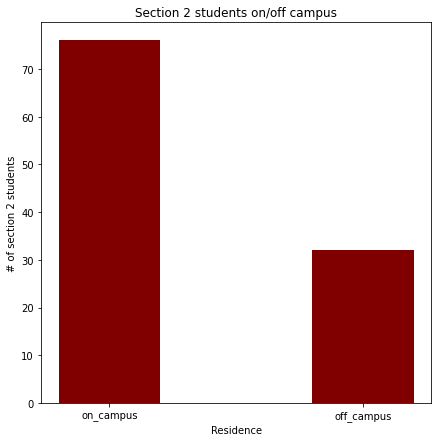

In [142]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data: dict[str,int] = {}
data["on_campus"] =  countoncampus[True]
data["off_campus"] = countoffcampus[True]
residence = list(data.keys())
enrollment = list(data.values())
  
fig = plt.figure(figsize = (7, 7))
 
# creating the bar plot
plt.bar(residence, enrollment, color ='maroon',
        width = 0.4)
 
plt.xlabel("Residence")
plt.ylabel("# of section 2 students")
plt.title("Section 2 students on/off campus")
plt.show()

## Second bar graph 

After observing that the amount of section2 students on campus triumphs being almost twice as much as section2 off campus, the bar graph below allows us to zoom out and visualize the amount of students in section 2 that are on_campus compared to the rest of the students in comp110.

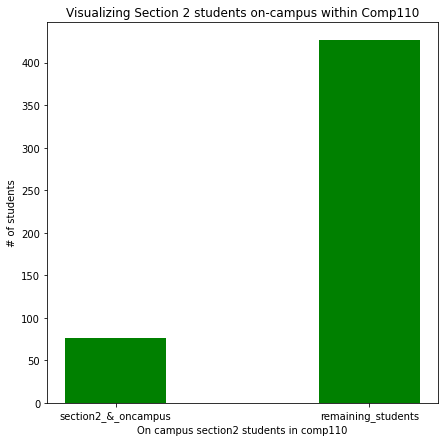

In [147]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data2: dict[str,int] = {}
data2["section2_&_oncampus"] = countoncampus[True]
data2["remaining_students"] = countoncampus[False]
Categories = list(data2.keys())
Enrolled_students = list(data2.values())
  
fig = plt.figure(figsize = (7, 7))
 
# creating the bar plot
plt.bar(Categories, Enrolled_students, color ='green',
        width = 0.4)
 
plt.xlabel("On campus section2 students in comp110")
plt.ylabel("# of students")
plt.title("Visualizing Section 2 students on-campus within Comp110")
plt.show()

# Conclusion

I was able to answer my intial question (Are there more students in section 2 and on-campus or section 2 and off-campus?), the answer being, there are more students in section 2 and on campus. This may be due to the asynchronous time being later and more convenient for students on campus who may be there due to on campus classes. The data proved my hypothesis wrong as I hypothesized that the students in section 2 that live off campus would be greater than section 2 on campus students.  
